# **Machine Learning ex-1(Python)**

<bold><p><span style="font-family: Arial; font-size:1.4em;color:blue;">Univariate Linear Regression </p></bold>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

In [2]:
def read_data(dataset):
    data = pd.read_csv(dataset, header = None)
    data.head()
    X = data.iloc[:, 0].values
    y = data.iloc[:, 1].values
    m = len(y)
    return X,y,m
X,y,m = read_data('ex1data1.txt')

# *Plotting Data*

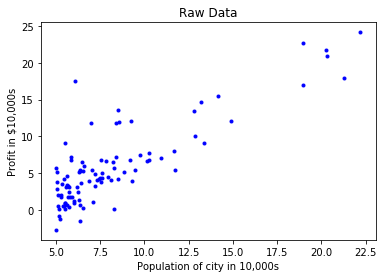

In [3]:
def plotData(X,y):
    plt.scatter(X, y, label = 'scatter', marker = '8', c = 'b', s = 10, alpha = 1)
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title("Raw Data")
    plt.show()
    
plotData(X,y)

#  *Initializing parameters and adding intercept term*

In [6]:
def initialize(X,y,dims,alpha_,iterations_):
    if(matrix_rank(X)==1):
        X=X[:,np.newaxis]
    if(matrix_rank(y)==1):
        y=y[:,np.newaxis]
    m=len(y)
    theta=np.zeros(dims)
    ones=np.ones((m,1))
    X=np.hstack((ones,X))
    alpha=alpha_
    iterations=iterations_
    return X,y,theta,alpha,iterations

In [7]:
X,y,theta,alpha,iterations=initialize(X,y,dims=[2,1],alpha_=0.01,iterations_=1500)
print("Shape of X is : "+str(X.shape))
print("Shape of y is : "+str(y.shape))
print("Initial theta is :"+str(theta))

Shape of X is : (97, 2)
Shape of y is : (97, 1)
Initial theta is :[[0.]
 [0.]]


# *Compute Cost*

In [8]:
def computeCost(X, y, theta):
    m = len(y)
    J = 1/2*np.mean(np.power((np.matmul(X,theta))-y,2))
    return J
J = computeCost(X, y, theta)
J

32.072733877455676

# *Implementing Gradient Descent*

In [9]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=np.zeros([num_iters,1])
    for iter in range(num_iters):
        error=np.dot(X,theta)-y
        temp=np.dot(X.T,error)
        theta=theta-(alpha/m)*temp
        J_history[iter]=computeCost(X,y,theta)
    return theta,J_history

theta,J_history=gradientDescent(X,y,theta,alpha,iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

In [10]:
def showPredictedPlot(X,y,theta):
    plt.scatter(X[:,1],y)
    plt.plot(X[:,1],np.dot(X,theta))
    plt.title('Raw Data + Linear Fit')
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show()

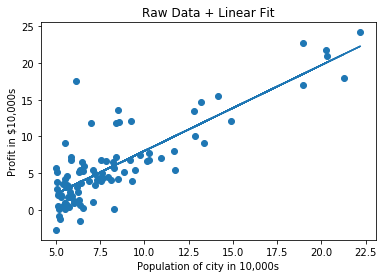

In [11]:
showPredictedPlot(X,y,theta)

<bold><p><span style="font-family: Arial; font-size:1.4em;color:blue;">Multiivariate Linear Regression </p></bold>

# *Reading dataset*

In [132]:
def read_data(dataset):
    data=pd.read_csv(dataset, sep=',', header=None)
    X=data.iloc[:,0:2].values
    y=data.iloc[:,2].values
    return X,y

In [133]:
X,y=read_data('ex1data2.txt')

# *Feature Normalisation*

In [134]:
def featureNormalization(X):
   
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X=(X-mu)/(sigma)
    return X, mu, sigma

In [135]:
X, mu, sigma=featureNormalization(X)
y, mu, sigma=featureNormalization(y)
X.shape

(47, 2)

#  *Initializing parameters and adding intercept term*

In [136]:
X, y, theta, alpha, iterations=Initialize(X, y, dims=[3,1], alpha_=0.01, iterations_=400)
print("Shape of X is : "+str(X.shape))
print("Shape of y is : "+str(y.shape))
print("Initial theta is :"+str(theta))

Shape of X is : (47, 3)
Shape of y is : (47, 1)
Initial theta is :[[0.]
 [0.]
 [0.]]


# *Compute Cost*

In [137]:
def computeCostMulti(x, y, theta):
    m = y.shape[0]
    j = np.sum(np.power(np.matmul(x, theta)-y, 2))/(2*m)
    return j

# *Gradient Descent*

In [138]:
def gradientDescentMulti(x, y, theta, alpha, num_iters):
    m = y.shape[0]
    j_history = np.zeros(num_iters)
    for i in range(0, num_iters):
        error = np.matmul(x, theta)-y
        temp = theta - alpha*np.dot(error, x)/m
        j_history[i] = computeCostMulti(x, y, theta)
    return [temp, j_history]
theta,J_history=gradientDescent(X,y,theta,alpha,iterations)

In [139]:
print(computeCostMulti(X,y,theta))

0.13637010283773102


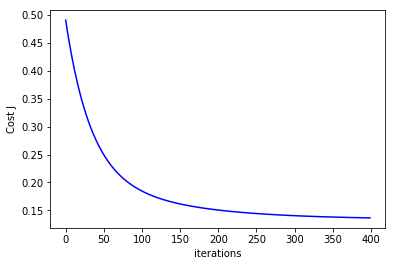

In [141]:
plt.plot(range(0, 400),J_history,color='blue',linestyle='solid')
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.show()

#  *Normal  Equation*

In [142]:
def read_data(dataset):
    data=pd.read_csv(dataset, sep=',', header=None)
    X=data.iloc[:,0:2].values
    y=data.iloc[:,2].values
    m = len(y)
    return X,y
X,y=read_data('ex1data2.txt')


In [143]:
X, y, theta, alpha, iterations=initialize(X, y, dims=[3,1], alpha_=0.01, iterations_=1500)
print("Shape of X is : "+str(X.shape))
print("Shape of y is : "+str(y.shape))
print("Initial theta is :"+str(theta))

Shape of X is : (47, 3)
Shape of y is : (47, 1)
Initial theta is :[[0.]
 [0.]
 [0.]]


In [144]:
def normal_equation(x, y):
    return np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    x = np.matmul(inv(np.matmul(X.transpose(),X)), X.transpose())
    theta = np.matmul(x,y)
    return theta
theta = normal_equation(X,y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [145]:
#Prediction
X_new = X[46]
print(np.dot(theta.T,X_new))


[230854.29304901]


In [146]:
#Prediction
r = np.array([1, 1811, 4])
print(np.matmul(r, theta))

[306756.3637394]
